In [25]:
# packages
from typing import Any, Callable, List, Optional, Tuple, Union

import torch
# import torch.nn.functional as F
# import torchvision
# from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [26]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [27]:
device

device(type='cuda')

In [28]:
import os
import pandas as pd
# from torchvision.io import read_image
from PIL import Image
import torchvision
from sklearn.preprocessing import LabelEncoder
import os

In [29]:
directories = []
training_dir="C:/Users/User/5GIA/VO/Proyecto final/animals_dataset_bbs/train"
for directory in os.listdir(training_dir):
    directories.append(directory)
print(directories)

['Bear', 'Brown_bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor_seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths_and_butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar_bear', 'Rabbit', 'Raccoon', 'Raven', 'Red_panda', 'Rhinoceros', 'Scorpion', 'Seahorse', 'Sea_lion', 'Sea_turtle', 'Shark', 'Sheep', 'Shrimp', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squid', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Turtle', 'Whale', 'Woodpecker', 'Worm', 'Zebra']


In [30]:
save_path = r"C:\Users\User\5GIA\VO\Proyecto final\modelo7"
PATH = os.path.join(save_path, "model_weights.pth")

In [31]:
model = torchvision.models.detection.fasterrcnn_mobilenet_v3_large_320_fpn()
num_classes = 80
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

model.load_state_dict(torch.load(PATH))
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(320,), max_size=640, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): FrozenBatchNorm2d(16, eps=1e-05)
        (2): Hardswish()
      )
      (1): InvertedResidual(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
            (2): ReLU(inplace=True)
          )
          (1): Conv2dNormActivation(
            (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(16, eps=1e-05)
          )
        )
      )
      (2): InvertedResidual(
        (block): 

In [32]:
le = LabelEncoder()
le.fit(directories)

LabelEncoder()

In [33]:
path = r"C:\Users\User\5GIA\VO\Proyecto final\12H-20240109\29f606332b.jpg"
Tula = Image.open(path).convert("RGB")  # r"C:\Users\User\5GIA\VO\Proyecto final\foto_Tula_VO.jpg"
Tula = torchvision.transforms.ToTensor()(Tula).to(torch.float32)

In [34]:
pred = model([Tula])
nms_idx = torchvision.ops.nms(pred[0]["boxes"], pred[0]["scores"], iou_threshold=0.5)

pred[0]["boxes"] = pred[0]["boxes"][nms_idx]
pred[0]["labels"] = pred[0]["labels"][nms_idx]
pred[0]["scores"] = pred[0]["scores"][nms_idx]

In [35]:
immm = torchvision.utils.draw_bounding_boxes((Tula*255).to(torch.uint8), pred[0]['boxes'], width=5)
img = torchvision.transforms.ToPILImage()(immm)
img
lbl = le.inverse_transform(list(pred[0]['labels']))

['Penguin']


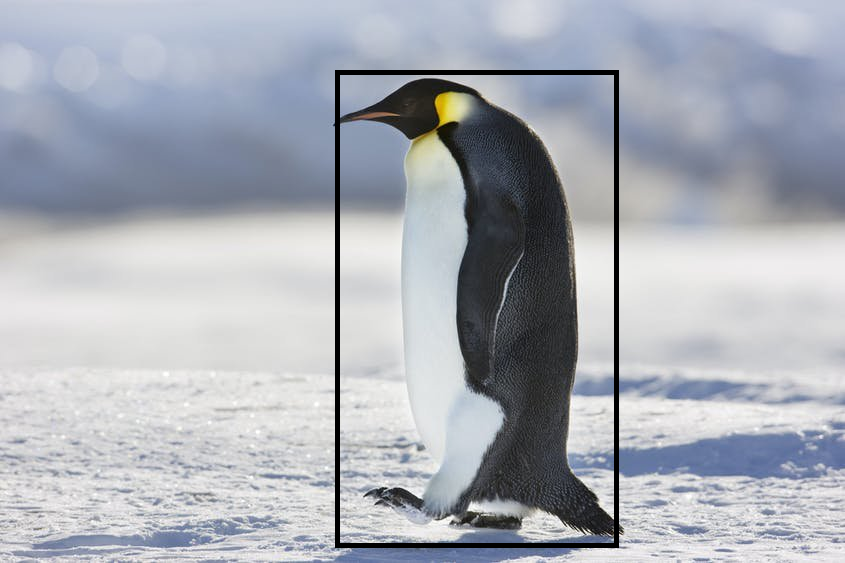

In [36]:
print(lbl)
img